# Face Recognition with Eigenfaces and DLIB

TODO update description

In this exercise, we will use the DLIB library to perform face recognition. DLIB is a modern C++ toolkit containing machine learning algorithms and tools for creating complex software in C++ to solve real world problems. It is used in both industry and academia in a wide range of domains including robotics, embedded devices, mobile phones, and large high performance computing environments. DLIB's open source licensing allows you to use it in any application, free of charge.

In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

TODO loading the data, some dataset description

In [2]:
faces = fetch_lfw_people(min_faces_per_person=10)

X = faces.data
y = faces.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('identities:', np.unique(y_train))

identities: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


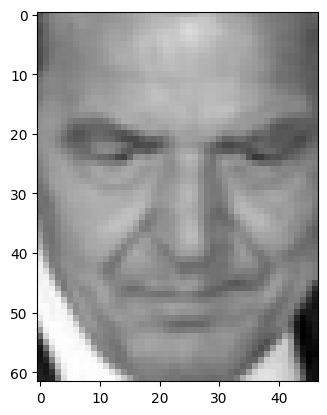

In [3]:
plt.imshow(X[0].reshape(62, 47), cmap='gray')

TODO Creating the model, describe eigenfaces, refresh/explain PCA, turn into coding assignment

In [4]:
# We will use RandomizedPCA to consider only most important features of the dataset. 

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Let’s take advantage of pipelines that combines multiple steps together and helps to write a clear code 
model = make_pipeline(pca, svc)

model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(class_weight='balanced'))])

do predictions, possibly also make the student code this

In [5]:
predictions = model.predict(X_test)

# Let’s print out the Accuracy Score of our model
print( "Accuracy Score: " + str(accuracy_score(predictions, y_test)) )

# Let’s print out the values of Predicted vs Actual 
# print( "Predictions\n-------------------------")
# print("Predicted,Actual")

# for cnt in range(len(predictions)):	
#     if predictions[cnt] == y_test[cnt]:
#         predicted = faces.target_names[predictions[predictions[cnt]]]
#         actual = faces.target_names[y_test[y_test[cnt]]]
#         print("%s,%s" % (str(predicted).strip(),str(actual).strip() )  )

Accuracy Score: 0.5654008438818565


# Now let's try a deep learning approach with DLIB

TODO explain how dlib works
TODO cleanup code
TODO explain why it works so well

insert dlib architecture diagram, explain the data difference

In [59]:
import face_recognition

imgs_train = (X_train.reshape(-1, 62, 47, 1) * 255).astype(np.uint8).repeat(3, axis=3)
imgs_test = (X_test.reshape(-1, 62, 47, 1) * 255).astype(np.uint8).repeat(3, axis=3)

# imgs_train = np.array([cv.resize(img, (320, 320)) for img in imgs_train])
# imgs_test = np.array([cv.resize(img, (320, 320)) for img in imgs_test])

embs = np.array([face_recognition.face_encodings(img, [(0, 47, 62, 0)]) for img in imgs_train])
centroids = np.array([np.mean(embs[y_train == i], axis=0) for i in range(len(np.unique(y)))])
embs_test = np.array([face_recognition.face_encodings(img, [(0, 47, 62, 0)])[0] for img in imgs_test])
preds = np.array([np.argmin([np.linalg.norm(e - centroids[i]) for i in range(len(np.unique(y)))]) for e in embs_test])

print(preds)

print("Accuracy: ", accuracy_score(preds, y_test))

[ 7 21  7  7  4  7  9  7  7  2  8  7 13  1  2  7  7  4  4  8 15  9  5  8
  9  7  7  8  7  7  7  2  7  7 20  5  7  8  7 20  1  0  7  7 20  8  7  7
  7  8 10  4  7  8 15  7  7  7  6 16  4  7  6  7  7  1  7  7  7 19 17 12
  7  7  9  7  4  7  8 16  7  7  6 16  7 15 16  7  4  7  8 14  8  6  0 18
  7  4  7  7  7  7  8  1 15  7  7  7 18  7  8 20  8 15  7  9  4  7  7 17
  7  7  6  9  8  3  8  9 15  3  7 19  7 10  1  7  8  7 10  3  7  8  8  7
  7  9 15  5  7  7  4  2  7 12 10  4  7  7  7  7 15  4  7  7  7  4  7  7
  7  7  1  8  7  4  6  7  4  4 12  7 19  7 17  7  9 21  4 13 20  7  7  4
  7 19 18 12  7  7  5  8  9 17  1  3  7  2 18  4  8 16 18  7  4  7  7 11
  7  7  7  8  8  7  4 11  8  9  2  7 13 15  9  7  7 17  1  7  7]
Accuracy:  0.9873417721518988


todo: (optional?) let students upload their own faces and see if it works on them